# Homework 3 - Sean Saito

Implementation of SIFT Keypoint filtering

In [61]:
# Imports
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)

# Global variables
im_file = "yale-nus.png"
grey_file = "greyscale.png"

# Greyscale the image
img = Image.open(im_file).convert("L")
img.save(grey_file)

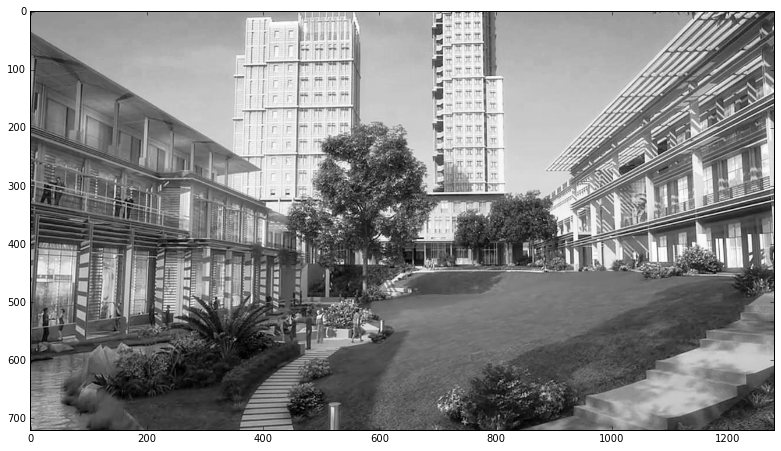

In [62]:
# Now get the image via matplotlib
img = mpimg.imread(grey_file)

# Show original
plt.imshow(img, cmap='Greys_r')

In [63]:
img

array([[ 0.49803922,  0.49803922,  0.49411765, ...,  0.19215687,
         0.23921569,  0.25490198],
       [ 0.49803922,  0.49803922,  0.49411765, ...,  0.23921569,
         0.27058825,  0.26666668],
       [ 0.49803922,  0.49803922,  0.49411765, ...,  0.29019609,
         0.3019608 ,  0.27843139],
       ..., 
       [ 0.6156863 ,  0.61960787,  0.61960787, ...,  0.23137255,
         0.23921569,  0.24313726],
       [ 0.60000002,  0.59607846,  0.59215689, ...,  0.21176471,
         0.22352941,  0.22745098],
       [ 0.55686277,  0.54901963,  0.53725493, ...,  0.16078432,
         0.16470589,  0.16470589]], dtype=float32)

In [64]:
# Resize the images
level_1 = img
level_2 = scipy.misc.imresize(level_1, 0.8)
level_3 = scipy.misc.imresize(level_2, 0.8)
shapes = [level_1.shape, level_2.shape, level_3.shape]

In [65]:
# Size of the images before convolution
print "Level 1: %s, Level 2: %s, Level 3: %s" % (level_1.shape, level_2.shape, level_3.shape)

Level 1: (720, 1280), Level 2: (576, 1024), Level 3: (460, 819)


In [66]:
# Convolution and Gaussian generators

def convolution(X, kernel):
    """
    Apply convolution over an image using a kernel
    
    Args:
        X         : numpy.ndarray
            input image
        kernel    : list
            list of filters. All filters should have the same dimension
    """
    
    shape = X.shape
    kernel_shape = kernel[0].shape
    
    # Number of rows and columns
    target_x = shape[0] - kernel_shape[0] + 1
    target_y = shape[1] - kernel_shape[1] + 1
    
    target = np.zeros((target_x, target_y))
    
    for i in range(target_x):
        for j in range(target_y):
            input_sub = X[i:(i+kernel_shape[0]), j:(j+kernel_shape[1])]
            combined = 0
            for f in kernel:
                interm = np.sum(np.multiply(input_sub, f))
                combined += interm
            target[i, j] = combined
    
    return target

def gaussian(sigma, length=31):
    """
    Generate the gaussian kernel based on sigma.
    Kernel size is lengthxlength
    """
    mask = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            x = abs(i - length/2)
            y = abs(j - length/2)
            e = np.exp((-1) * ((x**2) + (y ** 2)) / (2 * (sigma ** 2)))
            g = e / (2 * np.pi * (sigma ** 2))
            mask[i, j] = g
    return mask

In [67]:
# 5 different Gaussian kernels
gaussians = [[gaussian(i)] for i in [1.0, 2.0, 4.0, 8.0, 16.0]]

# For storing the convolutions
convolve_store = [[] for i in range(3)]

# Convolve
for idx, (img, store) in enumerate(zip([level_1, level_2, level_3], convolve_store)):
    for kernel in gaussians:
        conv = convolution(img, kernel)
        store.append(scipy.misc.imresize(conv, shapes[idx])/255.0)

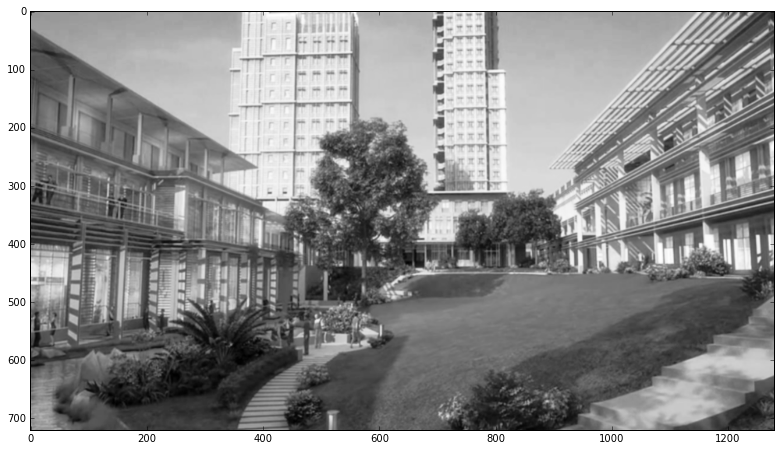

In [68]:
plt.imshow(convolve_store[0][0], cmap="Greys_r")

In [69]:
convolve_store[0][0]

array([[ 0.49803922,  0.49803922,  0.49803922, ...,  0.20784314,
         0.20784314,  0.21960784],
       [ 0.50196078,  0.50196078,  0.50196078, ...,  0.19607843,
         0.19215686,  0.19607843],
       [ 0.50196078,  0.50196078,  0.50196078, ...,  0.18823529,
         0.18431373,  0.18431373],
       ..., 
       [ 0.49803922,  0.49411765,  0.49019608, ...,  0.21960784,
         0.23137255,  0.23137255],
       [ 0.51372549,  0.50196078,  0.49411765, ...,  0.21960784,
         0.23529412,  0.23921569],
       [ 0.51764706,  0.50196078,  0.49411765, ...,  0.20392157,
         0.21960784,  0.22745098]])

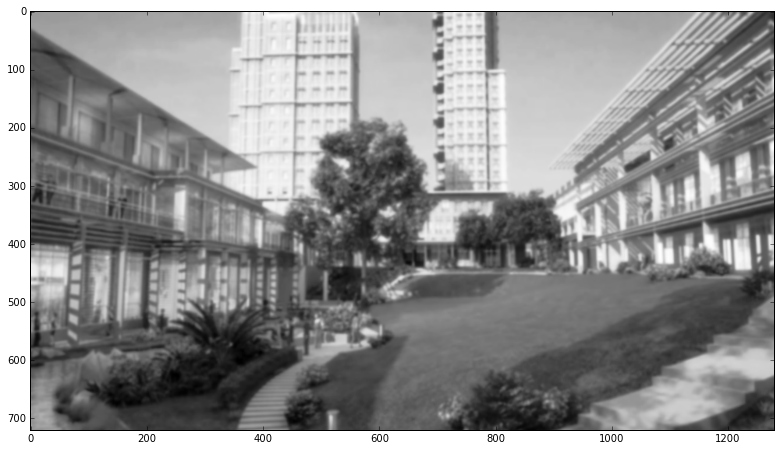

In [70]:
plt.imshow(convolve_store[0][1], cmap="Greys_r")

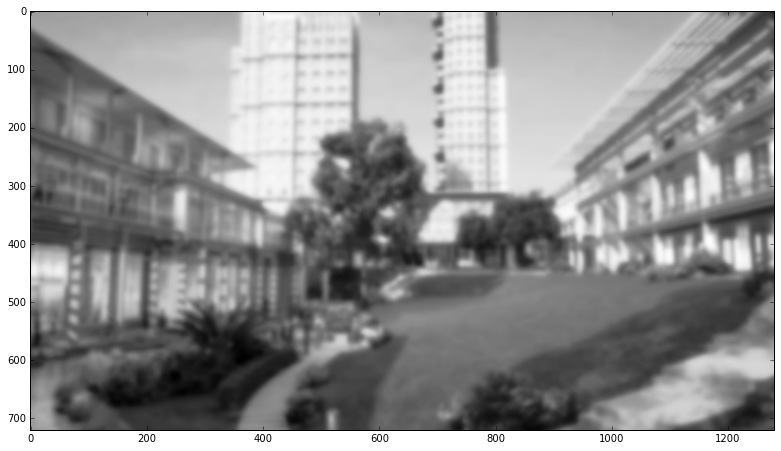

In [71]:
plt.imshow(convolve_store[0][2], cmap="Greys_r")

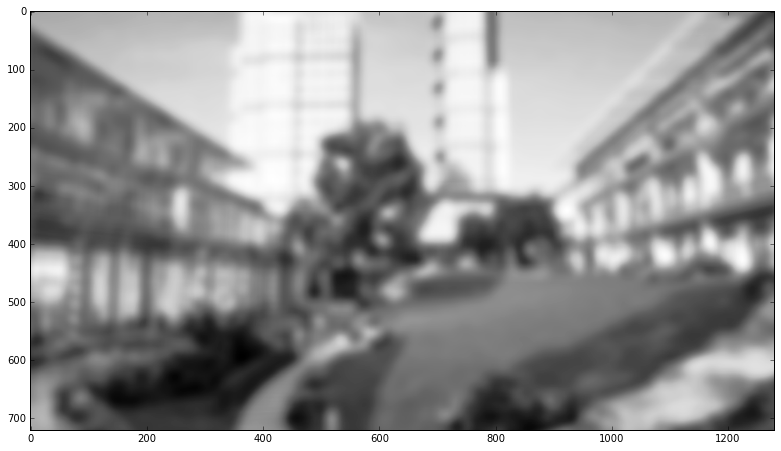

In [72]:
plt.imshow(convolve_store[0][3], cmap="Greys_r")

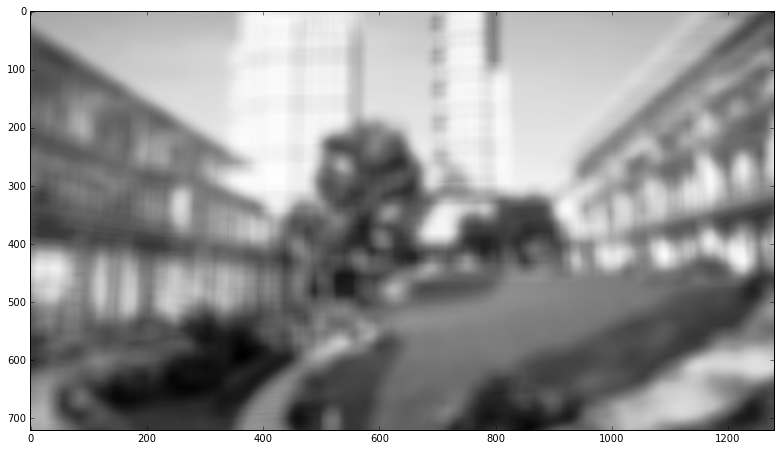

In [73]:
plt.imshow(convolve_store[0][4], cmap="Greys_r")

In [74]:
# Now compute the differences and resize
diffs = [[] for i in range(3)]
for idx, level in enumerate(convolve_store):
    for i in range(len(level)-1):
        diffs[idx].append(level[i+1] - level[i])
#         img = scipy.misc.imresize(level[i+1]-level[i], shapes[idx])
#         diffs[idx].append(img/255.0)


In [75]:
print convolve_store[0][0]
print convolve_store[0][1]

[[ 0.49803922  0.49803922  0.49803922 ...,  0.20784314  0.20784314
   0.21960784]
 [ 0.50196078  0.50196078  0.50196078 ...,  0.19607843  0.19215686
   0.19607843]
 [ 0.50196078  0.50196078  0.50196078 ...,  0.18823529  0.18431373
   0.18431373]
 ..., 
 [ 0.49803922  0.49411765  0.49019608 ...,  0.21960784  0.23137255
   0.23137255]
 [ 0.51372549  0.50196078  0.49411765 ...,  0.21960784  0.23529412
   0.23921569]
 [ 0.51764706  0.50196078  0.49411765 ...,  0.20392157  0.21960784
   0.22745098]]
[[ 0.50588235  0.50588235  0.50588235 ...,  0.20392157  0.21176471
   0.21960784]
 [ 0.50588235  0.50588235  0.50588235 ...,  0.19607843  0.2         0.20392157]
 [ 0.50980392  0.50980392  0.50980392 ...,  0.19215686  0.19215686
   0.19215686]
 ..., 
 [ 0.50588235  0.50196078  0.50196078 ...,  0.22352941  0.22745098
   0.23529412]
 [ 0.50588235  0.50196078  0.49803922 ...,  0.20784314  0.21568627
   0.21960784]
 [ 0.50196078  0.49411765  0.49019608 ...,  0.19607843  0.20392157
   0.20784314]]


In [76]:
diff = convolve_store[0][1] - convolve_store[0][0]
diff.shape

(720, 1280)

In [77]:
print shapes

[(720, 1280), (576, 1024), (460, 819)]


In [78]:
diff

array([[ 0.00784314,  0.00784314,  0.00784314, ..., -0.00392157,
         0.00392157,  0.        ],
       [ 0.00392157,  0.00392157,  0.00392157, ...,  0.        ,
         0.00784314,  0.00784314],
       [ 0.00784314,  0.00784314,  0.00784314, ...,  0.00392157,
         0.00784314,  0.00784314],
       ..., 
       [ 0.00784314,  0.00784314,  0.01176471, ...,  0.00392157,
        -0.00392157,  0.00392157],
       [-0.00784314,  0.        ,  0.00392157, ..., -0.01176471,
        -0.01960784, -0.01960784],
       [-0.01568627, -0.00784314, -0.00392157, ..., -0.00784314,
        -0.01568627, -0.01960784]])

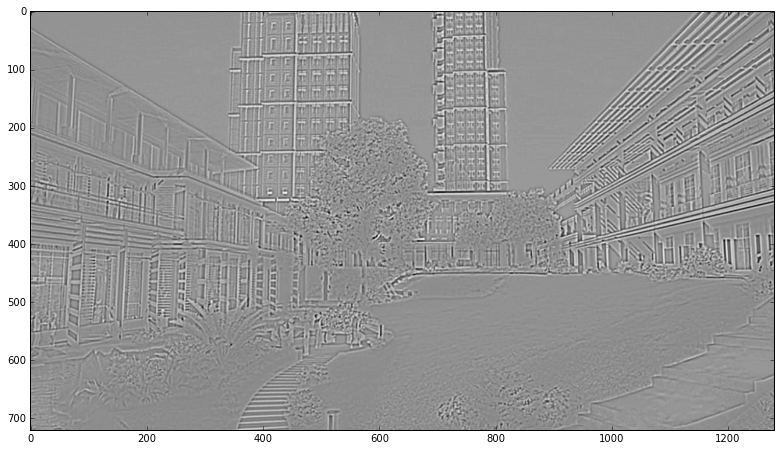

In [79]:
plt.imshow(diff, cmap="Greys_r")

In [80]:
# Now extract the key points

def get_neighbors(arr, x, y):
    return [arr[x-1, y], arr[x, y-1], arr[x+1, y], arr[x, y+1], arr[x+1, y+1], arr[x-1, y-1],
           arr[x-1, y+1], arr[x+1, y-1]]

keypoints = [[[[], []] for i in range(4)] for j in range(3)] # First array for x, second array for y points
min_keypoints = [[[[], []] for i in range(4)] for j in range(3)] # For minimum points
# keypoints = [[[], []] for i in range(3)] # First array for x, second array for y points
# min_keypoints = [[[], []] for i in range(3)] # For minimum points
for idx, level in enumerate(diffs):
    # The range of the DoGs to go through
    for i in range(0, len(level)):
        curr_level = level[i]
        for x in range(1, curr_level.shape[0] - 1): # Start from index 1 and end at dim - 1 for simplicity
            for y in range(1, curr_level.shape[1] - 1):
                if i == 0:
                    neighbors = get_neighbors(curr_level, x, y) + get_neighbors(level[i+1], x, y)
                elif i == len(level) - 1:
                    neighbors = get_neighbors(curr_level, x, y) + get_neighbors(level[i-1], x, y)
                else:
                    neighbors = get_neighbors(curr_level, x, y) + get_neighbors(level[i-1], x, y) + get_neighbors(
                                            level[i+1], x, y)
                
                if curr_level[x, y] > max(neighbors): # We have a keypoint
                    keypoints[idx][i][0].append(x)
                    keypoints[idx][i][1].append(y)
                if curr_level[x, y] < min(neighbors): # We have a min keypoint
                    min_keypoints[idx][i][0].append(x)
                    min_keypoints[idx][i][1].append(y)

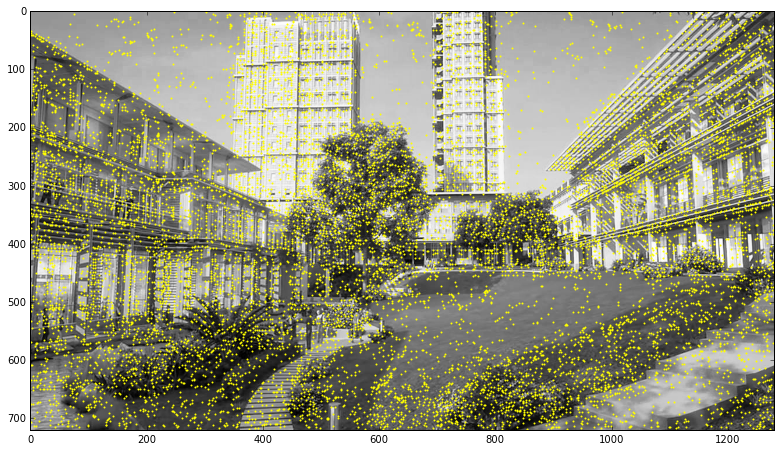

In [81]:
y = keypoints[0][0][0] + keypoints[0][1][0] + keypoints[0][2][0] + keypoints[0][3][0]
x = keypoints[0][0][1] + keypoints[0][1][1] + keypoints[0][2][1] + keypoints[0][3][1]
# y_min = min_keypoints[0][0][0] + min_keypoints[0][1][0] + min_keypoints[0][2][0] + min_keypoints[0][3][0]
# x_min = min_keypoints[0][0][1] + min_keypoints[0][1][1] + min_keypoints[0][2][1] + min_keypoints[0][3][1]
# plt.scatter(x_min, y_min, zorder=1, s=1.0, color="yellow")
plt.scatter(x,y,zorder=1, s=1.0, color="yellow")
plt.imshow(level_1, zorder=0, extent=[0, level_1.shape[1], level_1.shape[0], 0], cmap="Greys_r")
plt.show()

In [82]:
def shift_image(arr, axis):
    shape = arr.shape
    if axis == 0: # Shifting up and down
        return np.vstack((np.zeros((1,shape[1])), np.delete(arr, shape[0]-1, axis)))
    else:
        return np.hstack((np.zeros((shape[0], 1)), np.delete(arr, shape[1]-1, axis)))


In [83]:
def get_derivs(arr, direction):
    """
    direction: 0 for y, 1 for x
    """
    store = [[] for i in range(3)]
    for idx, level in enumerate(arr):
        for i in range(len(level)):
            store[idx].append(level[i] - shift_image(level[i], direction))
    return store

x_derivs = get_derivs(diffs, 1)
xx_derivs = get_derivs(x_derivs, 1)
y_derivs = get_derivs(diffs, 0)
yy_derivs = get_derivs(y_derivs, 0)
xy_derivs = get_derivs(y_derivs, 1)
yx_derivs = get_derivs(x_derivs, 0)

# x_derivs = [[] for i in range(3)]
# for idx, level in enumerate(diffs):
#     for i in range(len(level)):
#         x_derivs[idx].append(level[i] - shift_image(level[i], 0))        
# for idx, level in enumerate(x_derivs):
#     for i in range(len(level)):
#         xx_derivs[idx].append(level[i] - shift_image(level[i], 0))
        
# y_derivs = [[] for i in range(3)]
# for idx, level in enumerate(diffs):
#     for i in range(len(level)):
#         y_derivs[idx].append(level[i] - shift_image(level[i], 1))
        
# yy_derivs = [[] for i in range(3)]
# for idx, level in enumerate(y_derivs):
#     for i in range(len(level)):
#         yy_derivs[idx].append(level[i] - shift_image(level[i], 1))

In [84]:
len(x_derivs[0])

4

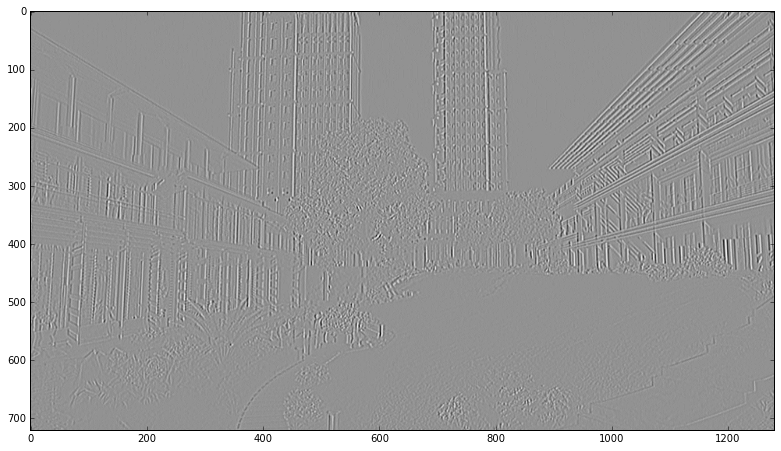

In [85]:
plt.imshow(x_derivs[0][0], cmap="Greys_r")

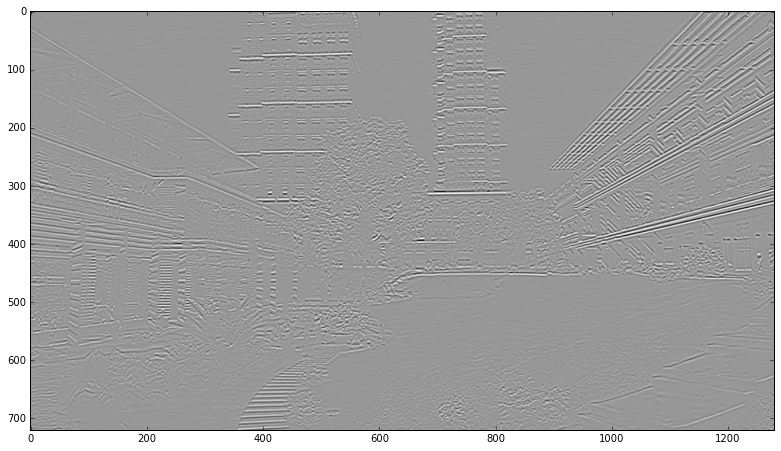

In [86]:
plt.imshow(y_derivs[0][0], cmap="Greys_r")

In [87]:
extracted_keypoints = [[[[], []] for i in range(4)] for j in range(3)] # First array for x, second array for y points
extracted_min_keypoints = [[[[], []] for i in range(4)] for j in range(3)] # For minimum points

m = 10^-6
threshold = 0.02
r_ratio = (10 + 1)**2 / 10

for idx, gaussian in enumerate(keypoints):
    for level_idx, level in enumerate(gaussian):
        x_points, y_points = level[0], level[1]
        for x_point, y_point in zip(x_points, y_points):
            window = x_derivs[idx][level_idx][x_point-1:x_point+2, y_point-1:y_point+2]
            second_derivs = np.array([[xx_derivs[idx][level_idx][x_point, y_point], 
                                       yx_derivs[idx][level_idx][x_point, y_point]],
                                      [xy_derivs[idx][level_idx][x_point, y_point],
                                       yy_derivs[idx][level_idx][x_point, y_point]]])
            first_derivs = np.array([x_derivs[idx][level_idx][x_point, y_point],
                                    y_derivs[idx][level_idx][x_point, y_point]])
            second_derivs_inv = np.linalg.inv(second_derivs + np.eye(second_derivs.shape[1])*m)
            coordinates = -1 * np.dot(second_derivs_inv, first_derivs.T)
            
            vec = np.array([x_derivs[idx][level_idx][x_point, y_point], 
                                     y_derivs[idx][level_idx][x_point, y_point]])
            
            right = np.dot(vec, np.array(coordinates).T)
            d = diffs[idx][level_idx][x_point, y_point] + right
            
            # If low contrast, reject
            if d < threshold:
                continue
            
            # now check if it's an edge
            trace = second_derivs[0, 0] + second_derivs[1, 1]
            det = second_derivs[0, 0] * second_derivs[1, 1] - second_derivs[1, 0] * second_derivs[1, 0]
            
            if (trace**2/det) >= r_ratio:
                continue
            else:
                extracted_keypoints[idx][level_idx][0].append(x_point)
                extracted_keypoints[idx][level_idx][1].append(y_point)
            

/Users/saito/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/Users/saito/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in double_scalars


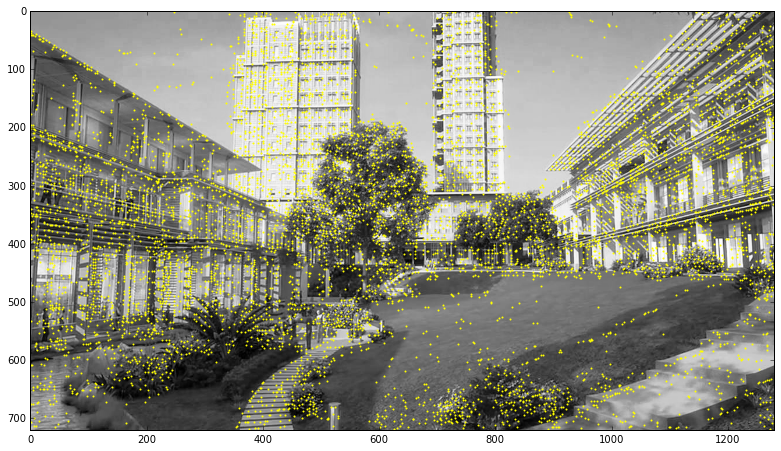

In [88]:
y = extracted_keypoints[0][0][0] + extracted_keypoints[0][1][0] + extracted_keypoints[0][2][0] + extracted_keypoints[0][3][0]
x = extracted_keypoints[0][0][1] + extracted_keypoints[0][1][1] + extracted_keypoints[0][2][1] + extracted_keypoints[0][3][1]
plt.scatter(x,y,zorder=1, s=1.0, color="yellow")
plt.imshow(level_1, zorder=0, extent=[0, level_1.shape[1], level_1.shape[0], 0], cmap="Greys_r")
plt.show()